In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv', sep = ';', low_memory=False)

print(df.head())

print("Decribe:")
print(df.describe())

   BillNo                             Itemname  Quantity             Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  1.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  1.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  1.12.2010 08:26   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6  1.12.2010 08:26   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6  1.12.2010 08:26   

  Price  CustomerID         Country  
0  2,55     17850.0  United Kingdom  
1  3,39     17850.0  United Kingdom  
2  2,75     17850.0  United Kingdom  
3  3,39     17850.0  United Kingdom  
4  3,39     17850.0  United Kingdom  
Decribe:
            Quantity     CustomerID
count  522064.000000  388023.000000
mean       10.090435   15316.931710
std       161.110525    1721.846964
min     -9600.000000   12346.000000
25%         1.000000   13950.000000
50%         3.000000   15265.000000
75%        10.000000   16837.000000
max     8099

In [2]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [3]:
# Filter rows with missing items names
df = df.dropna(subset=['Itemname'])
# Assigning unknown instead of missing CustomerIDs
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

print("Missing Values Check:")
print(df.isnull().sum())

Missing Values Check:
BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64


In [4]:
# Negative Quantity Check
invalid_quantities = df[df['Quantity'] < 0]
if not invalid_quantities.empty:
    # Replace negative values ​​with a specific value
    df.loc[df['Quantity'] < 0, 'Quantity'] = 1

In [5]:
# Zero or negative Price values check
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
invalid_prices = df[df['Price'] <= 0]
if not invalid_prices.empty:
    df.loc[df['Price'] <= 0, 'Price'] = df['Price'].mean()


In [6]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y %H:%M', errors='coerce')
# Check for invalid dates (for example, future dates)
future_dates = df[df['Date'] > datetime.now()]
if not future_dates.empty:
    # Change future dates to today's date
    df.loc[df['Date'] > datetime.now(), 'Date'] = datetime.now()


# TOP SELLERS ANALYSIS

In [7]:
# Grouping by sales amounts and finding total sales amounts
top_sellers = df.groupby('Itemname')['Quantity'].sum().reset_index()

# Sorting by total sales amounts
top_sellers = top_sellers.sort_values(by='Quantity', ascending=False)

In [8]:
print(top_sellers.head(10))

                                Itemname  Quantity
2420         PAPER CRAFT , LITTLE BIRDIE     80995
2078      MEDIUM CERAMIC TOP STORAGE JAR     77553
3972   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53799
1842             JUMBO BAG RED RETROSPOT     48002
3882  WHITE HANGING HEART T-LIGHT HOLDER     36527
232        ASSORTED COLOUR BIRD ORNAMENT     36085
2709                      POPCORN HOLDER     35601
2370     PACK OF 72 RETROSPOT CAKE CASES     34403
2771                  RABBIT NIGHT LIGHT     30518
2336           PACK OF 12 LONDON TISSUES     26243


# # Change of best-selling items in different time periods:

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

top_sellers_monthly = df.groupby(['Year', 'Month', 'Itemname'])['Quantity'].sum().reset_index()
top_sellers_monthly = top_sellers_monthly.sort_values(by=['Year', 'Month', 'Quantity'], ascending=[True, True, False])
top_sellers_monthly = top_sellers_monthly.groupby(['Year', 'Month']).head(1)

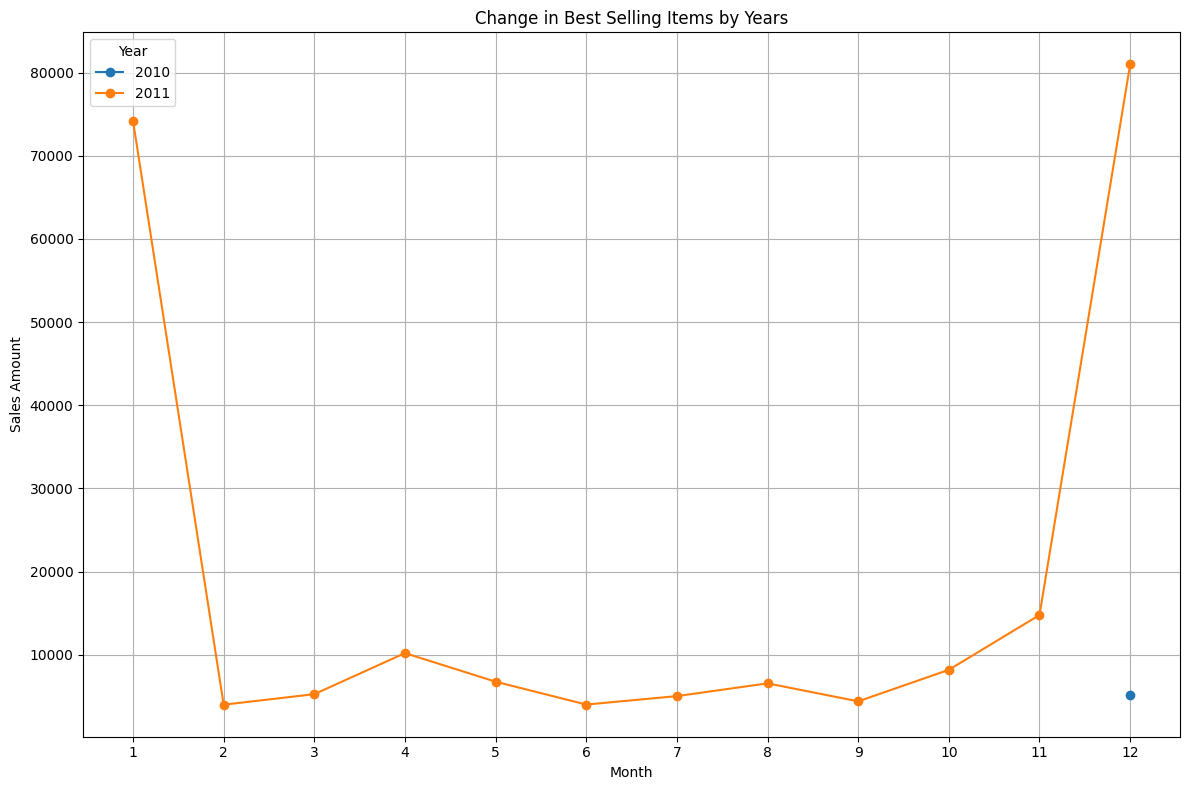

Best Selling Products by Month and Year:
        Year  Month                           Itemname  Quantity
2690   2010     12  WORLD WAR 2 GLIDERS ASSTD DESIGNS      5195
4052   2011      1     MEDIUM CERAMIC TOP STORAGE JAR     74215
5947   2011      2              EMPIRE DESIGN ROSETTE      3986
8736   2011      3            JUMBO BAG RED RETROSPOT      5252
12472  2011      4  WORLD WAR 2 GLIDERS ASSTD DESIGNS     10191
14633  2011      5               SMALL POPCORN HOLDER      6753
15073  2011      6                                  ?      4004
18553  2011      7     GIRLS ALPHABET IRON ON PATCHES      5019
20404  2011      8      ASSORTED COLOUR BIRD ORNAMENT      6553
24036  2011      9            JUMBO BAG RED RETROSPOT      4391
28366  2011     10  WORLD WAR 2 GLIDERS ASSTD DESIGNS      8180
30375  2011     11                 RABBIT NIGHT LIGHT     14774
32819  2011     12        PAPER CRAFT , LITTLE BIRDIE     80995


In [12]:
plt.figure(figsize=(12, 8))
for year in top_sellers_monthly['Year'].unique():
    year_data = top_sellers_monthly[top_sellers_monthly['Year'] == year]
    plt.plot(year_data['Month'], year_data['Quantity'], marker='o', label=year)

plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.title('Change in Best Selling Items by Years')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Best Selling Products by Month and Year:\n", top_sellers_monthly)

# SALES BY COUNTRY

In [13]:
# Finding the total sales amount by grouping sales by country
sales_by_country = df.groupby('Country')['Quantity'].sum().reset_index()

sales_by_country = sales_by_country.sort_values(by='Quantity', ascending=False)

print("Sales Analysis by Country:")
print(sales_by_country.head(30)) 

Sales Analysis by Country:
                 Country  Quantity
28        United Kingdom   4701745
16           Netherlands    200937
6                Germany    119263
5                 France    112104
0              Australia     84209
24                Sweden     36083
25           Switzerland     30630
23                 Spain     27951
12                 Japan     26016
3                Belgium     23237
17                Norway     19338
19              Portugal     16258
11                 Italy      8112
22             Singapore      5241
1                Austria      4881
8              Hong Kong      4773
10                Israel      4409
18                Poland      3684
29           Unspecified      3300
9                Iceland      2458
26                   USA      2458
7                 Greece      1557
27  United Arab Emirates       982
15                 Malta       970
14             Lithuania       652
13               Lebanon       386
4                 Brazil    

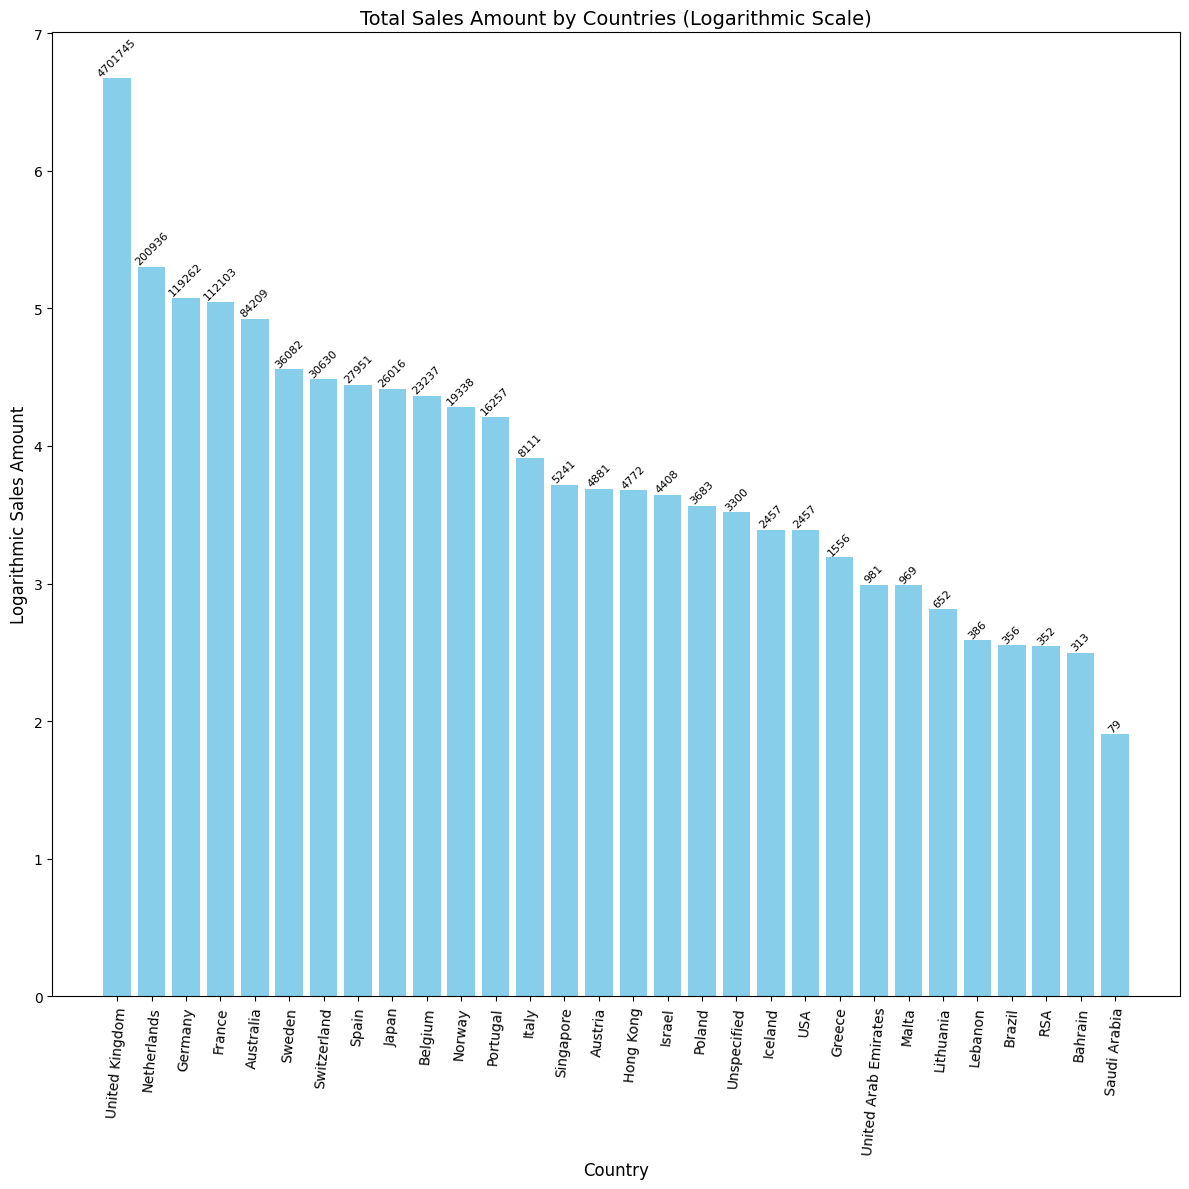

In [15]:
import numpy as np
plt.figure(figsize=(12, 12))

bars = plt.bar(sales_by_country['Country'], np.log10(sales_by_country['Quantity']), color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(10**yval), ha='center', va='bottom', fontsize=8, rotation = 45)

plt.xlabel('Country', fontsize=12)
plt.ylabel('Logarithmic Sales Amount', fontsize=12)
plt.title('Total Sales Amount by Countries (Logarithmic Scale)', fontsize=14)

plt.xticks(rotation=85, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# #Finding best-selling products by country:

In [16]:
top_selling_items = df.loc[df.groupby('Country')['Quantity'].idxmax()]
top_selling_items = top_selling_items.sort_values(by='Quantity', ascending=False)

print("Top Selling Items by Country:")
print(top_selling_items[['Country', 'Itemname', 'Quantity']])

Top Selling Items by Country:
                     Country                             Itemname  Quantity
520583        United Kingdom          PAPER CRAFT , LITTLE BIRDIE     80995
405107           Netherlands                   RABBIT NIGHT LIGHT      2400
492493                 Japan                   RABBIT NIGHT LIGHT      2040
309266             Australia               MINI PAINT SET VINTAGE      1152
407173                France                   RABBIT NIGHT LIGHT       912
114954                Sweden  12 PENCILS SMALL TUBE RED RETROSPOT       768
181188               Germany            ASSORTED COLOURS SILK FAN       600
50951                  Spain    PINK 3 PIECE POLKADOT CUTLERY SET       360
276354           Switzerland       GIRLS ALPHABET IRON ON PATCHES       288
258103             Singapore          CHRISTMAS TREE PAINTED ZINC       288
125864               Austria     SET 12 KIDS COLOUR  CHALK STICKS       288
272541               Belgium         FAIRY CAKES NOTEBOOK 

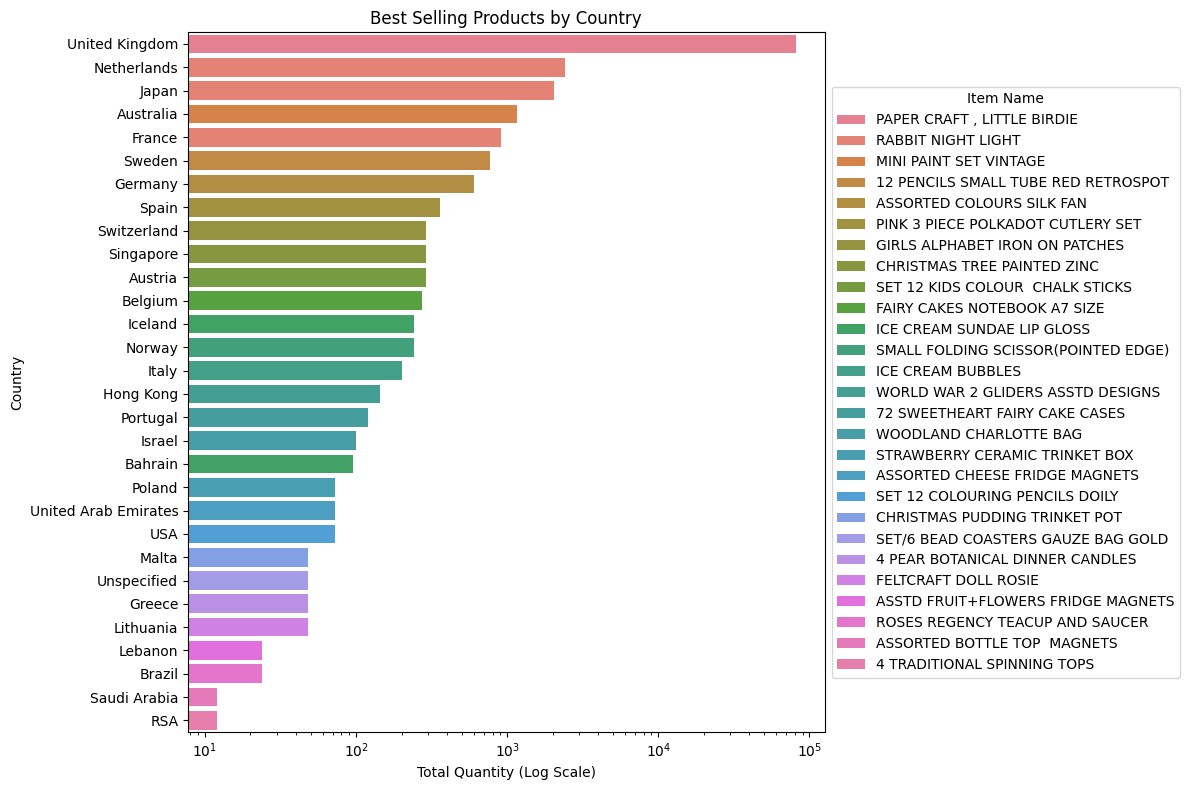

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_selling_items, x='Quantity', y='Country', hue='Itemname', dodge=False)

plt.xscale('log')

plt.xlabel('Total Quantity (Log Scale)')
plt.ylabel('Country')
plt.title('Best Selling Products by Country')
plt.legend(title='Item Name', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# RFM ANALYSIS

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520609 entries, 0 to 522063
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      520609 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    520609 non-null  int64         
 3   Date        520609 non-null  datetime64[ns]
 4   Price       2711 non-null    float64       
 5   CustomerID  520609 non-null  object        
 6   Country     520609 non-null  object        
 7   Year        520609 non-null  int32         
 8   Month       520609 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(4)
memory usage: 51.9+ MB


In [20]:
df['TotalPrice'] = df['Quantity'] * df['Price']

analysis_date = df['Date'].max() + pd.DateOffset(days=1)

# RFM Metric Calculation
rfm_df = df.groupby('CustomerID').agg({
    'Date': lambda x: (analysis_date - x.max()).days,  # Recency
    'BillNo': 'count',                                # Frequency
    'TotalPrice': 'sum'                               # Monetary
}).reset_index()

# Rename column names
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Calculating RFM Scores
# Just numeric columns
numerical_columns = ['Recency', 'Frequency', 'Monetary']
quantiles = rfm_df[numerical_columns].quantile(q=[0.2, 0.4, 0.6, 0.8]).to_dict()

def r_score(x, p, d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1

def fm_score(x, p, d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

rfm_df['R'] = rfm_df['Recency'].apply(r_score, args=('Recency', quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(fm_score, args=('Frequency', quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(fm_score, args=('Monetary', quantiles,))

# Merge RFM Scores
rfm_df['RFM_Score'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# Determining Customer Segments Based on RFM Scores
def rfm_segment(rfm):
    if rfm == '555':
        return 'Best Customers'
    elif rfm == '111':
        return 'Lost Customers'
    elif rfm[0] == '5':
        return 'Loyal Customers'
    elif rfm[1] == '5':
        return 'Frequent Customers'
    elif rfm[2] == '5':
        return 'High-Spending Customers'
    else:
        return 'Other Customers'

rfm_df['Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)

print(rfm_df.head(30))


   CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Score  \
0     12346.0      326          1       0.0  1  1  1       111   
1     12347.0        2        182       0.0  5  5  1       551   
2     12349.0       19         73     300.0  4  4  5       445   
3     12350.0      310         17      40.0  1  2  5       125   
4     12352.0       36         85     280.0  3  4  5       345   
5     12353.0      204          4       0.0  1  1  1       111   
6     12354.0      232         58       0.0  1  3  1       131   
7     12355.0      214         13       0.0  1  1  1       111   
8     12356.0       23         59     324.0  4  4  5       445   
9     12357.0       33        131      25.0  3  5  5       355   
10    12358.0        2         19     240.0  5  2  5       525   
11    12360.0       52        129     360.0  3  5  5       355   
12    12361.0      287         10      15.0  1  1  5       115   
13    12362.0        3        266     489.0  5  5  5       555   
14    1236

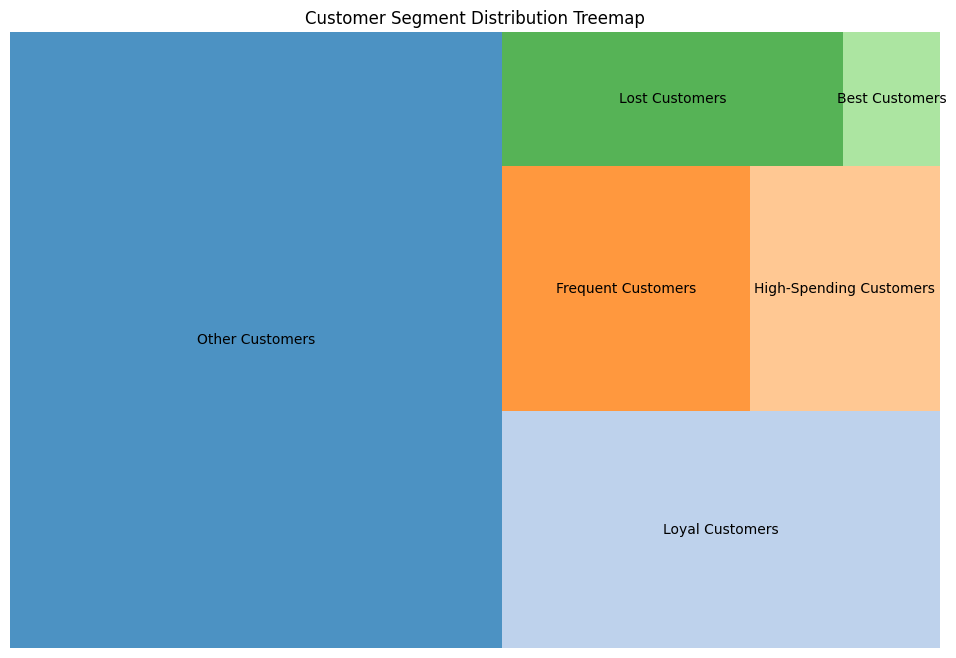

In [21]:
import squarify
import matplotlib.pyplot as plt

# Segmentlere göre müşteri sayısını hesaplayın
segment_counts = rfm_df['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Treemap Grafiği Oluşturma
plt.figure(figsize=(12, 8))
squarify.plot(sizes=segment_counts['Count'], 
              label=segment_counts['Segment'], 
              color=sns.color_palette('tab20', len(segment_counts)),
              alpha=.8)
plt.title('Customer Segment Distribution Treemap')
plt.axis('off')
plt.show()
